In [4]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import os
import random
import math

In [13]:
def compDist(pt:tuple, k, b, norm_para):
    # 应用点线距离公式确定亮点密度梯度，归一化
    # y = kx + b
    # pt: (s1, s2)
    # norm_para 是归一化参数
    x0, y0 = pt[0], pt[1]
    y_dis = (y0 - (k*x0 + b))/(math.sqrt(k**2 + 1))
    return y_dis / norm_para

compDist((1.414, 1.414), -1, 0, 1)

1.999697977195556

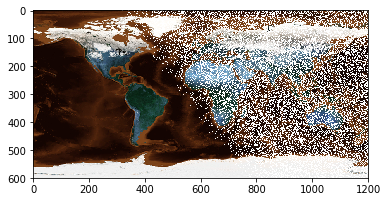

In [30]:
image_path_1 = "./earth.jpeg"
image_path_2 = "./surface.jpeg"

img_1 = cv.imread(image_path_1)
img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
#plt.imshow(img_1)
#plt.show()

# 均等密度亮点
# for i in range(0, 600):
#     for j in range(0, 1200):
#         flag = random.random()
#         if i < (j - 300) * 4 / 3:
#             # 向光面和背光面
#             dist = compDist((j, i), 1.3333, -400, 200)
#             if flag > 0.6:
#                 img_1[i,j,:] = 255

# 梯度亮点
max_prob = 0.4
norm_para = 300
for i in range(0, 600):
    for j in range(0, 1200):
        flag = random.random()
        dist = compDist((j, i), 1.333, -400, norm_para)
        if dist > 0: continue
        # 距离较近，越近亮点密度越低，控制距离在 300*0.4 = 120像素 
        else:
            dist = 0 - dist
        if dist < max_prob: 
            if flag < dist:
                img_1[i,j,:] = 255
        else:
            if flag < max_prob:
                img_1[i,j,:] = 255

img_1 = cv.cvtColor(img_1, cv.COLOR_RGB2BGR)
cv.imwrite("./earth_2.jpeg", img_1)
plt.imshow(img_1)
plt.show()

In [26]:
img_2 = cv.resize(cv.imread(image_path_2), (1200, 600))
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
for i in range(30, 180):
    for j in range(650, 750):
        flag = random.random()
        if flag > 0.85:
            if img_2[i,j,:] + 50 > 255:
                img_2[i,j,:] = 255
            img_2[i,j,:] += 50
plt.imshow(img_2)
plt.show()
cv.imwrite("./surface_2.jpeg", img_2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [8]:
item = random.random()
print(item)

0.04052773726468151


In [9]:
img_1.shape

(600, 1200, 3)